# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [190]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [191]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [192]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [193]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [194]:
# Extract all rows of data
table = soup.find('table', class_='table')
headers = [header.text for header in table.find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [195]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    data.append([col.text.strip() for col in columns])

In [196]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=headers)

In [197]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [198]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [199]:
# Change data types for data analysis
df[['sol', 'ls']]= df[['sol', 'ls']].astype(int)
df[['min_temp', 'pressure', 'month']] = df[['min_temp', 'pressure', 'month']].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [200]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [202]:
# 1. How many months are there on Mars?
months = df['month'].nunique()
print(months)

12


In [213]:
# 2. How many sols (Martian days) worth of data are there?
sols = df['sol'].nunique()
print(sols)

1867


In [223]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


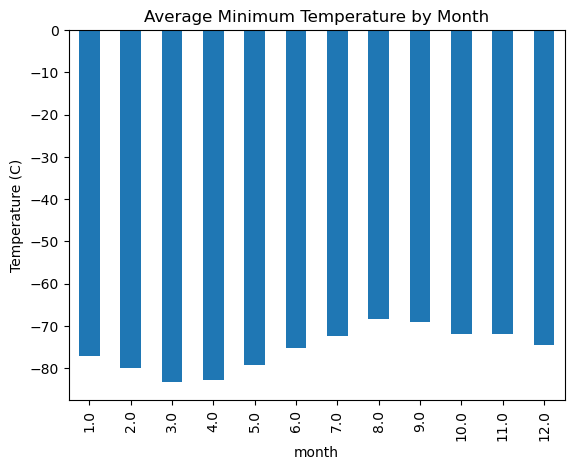

In [241]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar')
plt.ylabel('Temperature (C)')
plt.title("Average Minimum Temperature by Month")
plt.show()

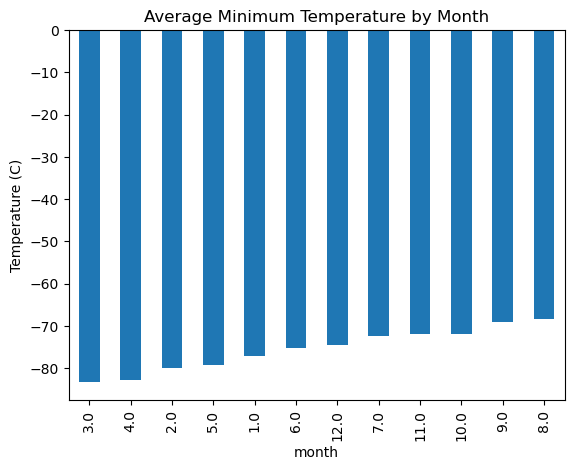

In [249]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp.sort_values().plot(kind='bar')
plt.ylabel('Temperature (C)')
plt.title("Average Minimum Temperature by Month")
plt.show()

In [256]:
# 4. What is the average pressure by month?
avg_monthly_pressure = df.groupby('month')['pressure'].mean()
print(avg_monthly_pressure)

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


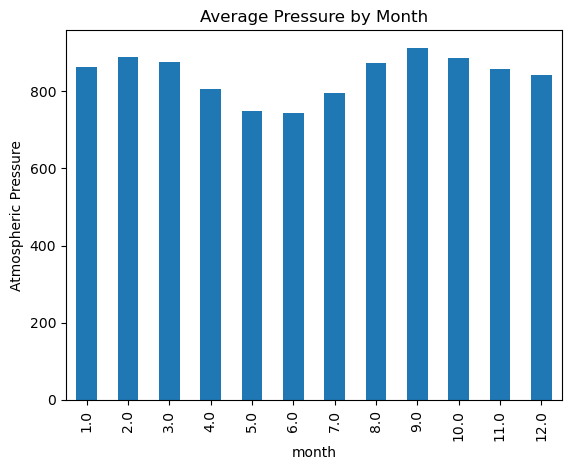

In [262]:
# Plot the average pressure by month
avg_monthly_pressure.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.title("Average Pressure by Month")
plt.show()

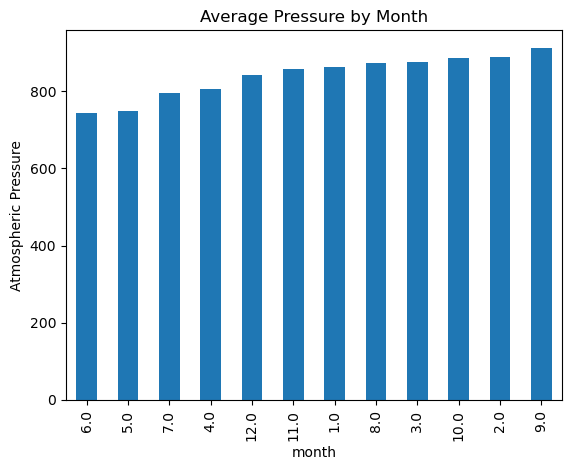

In [267]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_monthly_pressure.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.title("Average Pressure by Month")
plt.show()

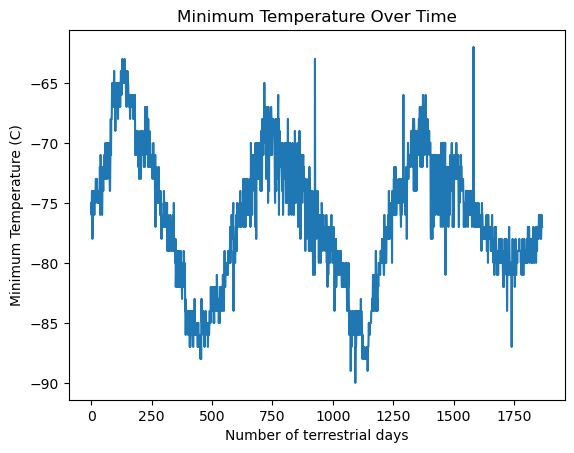

In [271]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.min_temp.plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature (C)')
plt.title("Minimum Temperature Over Time")
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

In [274]:
print("The 3rd and 4th month's have the coldest temperature on Mars, while the 8th and 9th months are the warmest.")

The 3rd and 4th month's have the coldest temperature on Mars, while the 8th and 9th months are the warmest.


#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [ ]:
print("The 6th and 5th months have the lowest atmospheric pressure on Mars, while the 2nd and 9th months have the highest.")

The 6th and 5th months have the lowest atmospheric pressure on Mars, while the 2nd and 9th months have the highest.


#### Year Length

YOUR ANALYSIS HERE

In [289]:
print("""Based off the trend in the minimum temperature over time graph, we see that the temperature reaches a low at about 450 terrestrial days and then reaches a low again at around 1,125 terrestrial days. 
      
This is equivalent to 675 days. Therefore, a year on Mars is most likely around 675 days. """)

Based off the trend in the minimum temperature over time graph, we see that the temperature reaches a low at about 450 terrestrial days and then reaches a low again at around 1,125 terrestrial days. 
      
This is equivalent to 675 days. Therefore, a year on Mars is most likely around 675 days. 


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [292]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)

In [293]:
browser.quit()